In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
print('done')

done


In [2]:
X,y_true = make_blobs(n_samples=500 , centers=3, cluster_std=0.60 , random_state=42)

In [5]:
df = pd.DataFrame(X,columns=['f1','f2'])

In [7]:
scale = StandardScaler()
X_scale = scale.fit_transform(df)

In [16]:
wcss_kmean = []
K_range = range(1,11)

In [17]:
for K in K_range:
    Kmeans = KMeans(n_clusters=K,random_state=42)
    Kmeans.fit(X_scale)
    wcss_kmean.append(Kmeans.inertia_)
    

In [18]:
wcss_kmean

[1000.0000000000001,
 297.8954141051722,
 11.57548472310498,
 9.75206797735684,
 8.25717527244628,
 6.917577320416799,
 6.334755391595288,
 5.70417717790143,
 5.060234133532076,
 4.762361898130397]

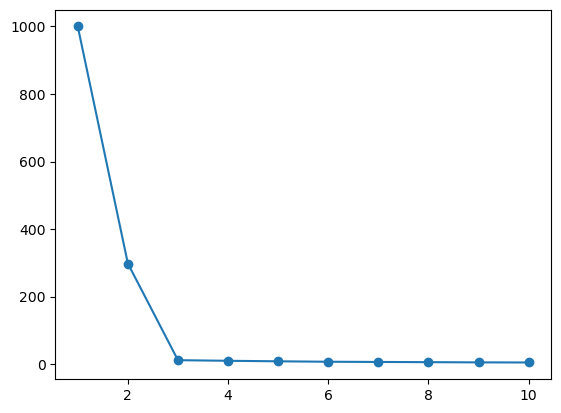

In [31]:
plt.plot(K_range,wcss_kmean,marker='o')
# here 3 is the cclusters points

In [23]:
final_kmean = KMeans(n_clusters=3,random_state=42)

In [25]:
clusters = final_kmean.fit_predict(X_scale)

In [26]:
df['clusters'] = clusters

<Axes: xlabel='f1', ylabel='f2'>

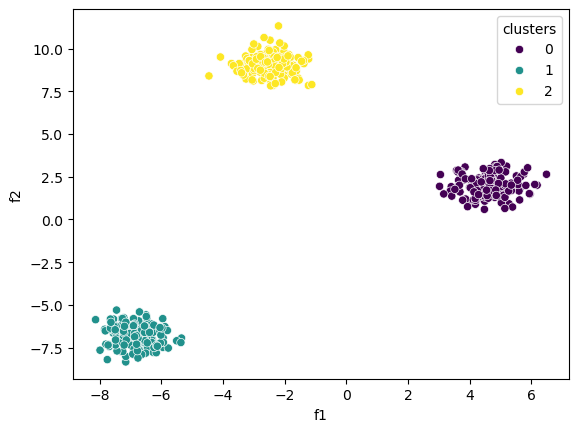

In [30]:
sns.scatterplot(x = df['f1'],
               y= df['f2'],
               hue=df['clusters'],
               palette='viridis')

# Problem with KMeans cluster

In [48]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans , DBSCAN

In [67]:
X , y_true= make_moons(n_samples=500,noise=0.05, random_state=42)

In [68]:
df2 = pd.DataFrame(X,columns=['f1','f2'])

In [69]:
# Standard Scaler
X_scale = scale.fit_transform(df2) 

In [70]:
kmean = KMeans(n_clusters=2, random_state=42)
kmean_lables = kmean.fit_predict(X_scale)

In [72]:
df2['kmean_labes'] = kmean_lables

<Axes: xlabel='f1', ylabel='f2'>

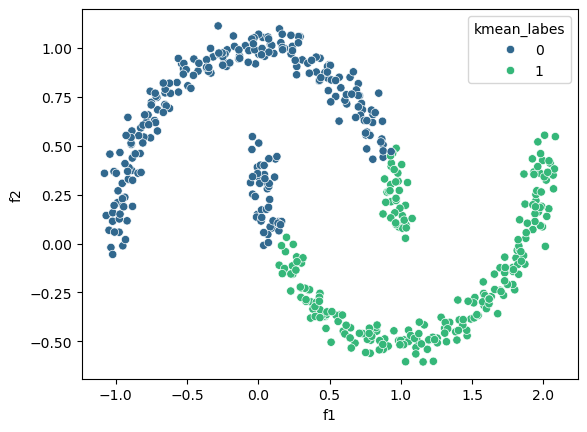

In [73]:
sns.scatterplot(x = df2['f1'],
               y = df2['f2'],
               hue= df2['kmean_labes'],
               palette='viridis')

# DBSCAN

In [74]:
dbscan = DBSCAN(eps=0.3 , min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scale)

In [75]:
df2['dbscan_labels'] = dbscan_labels

<Axes: xlabel='f1', ylabel='f2'>

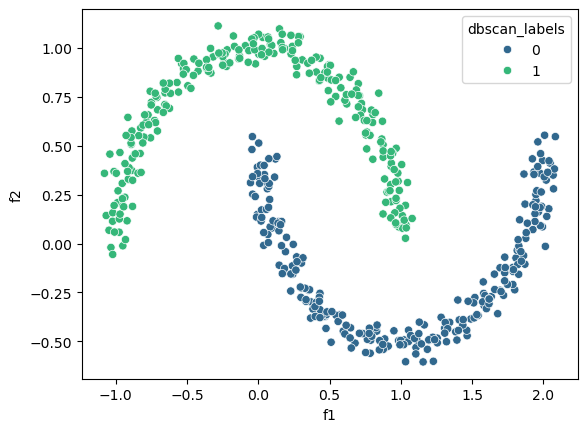

In [77]:
sns.scatterplot(x = df2['f1'],
               y = df2['f2'],
               hue= df2['dbscan_labels'],
               palette='viridis')